In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import statistics 
from scipy.stats import norm
from math import sqrt

In [93]:
# Load the dataset
loan_data = pd.read_csv('loan_data.csv')

In [94]:
loan_data=loan_data.dropna()

In [95]:
# Display basic information about the dataset
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>

Index: 499 entries, 0 to 613

Data columns (total 12 columns):

 #   Column              Non-Null Count  Dtype  

---  ------              --------------  -----  

 0   Gender              499 non-null    object 

 1   Married             499 non-null    object 

 2   Dependents          499 non-null    object 

 3   Education           499 non-null    object 

 4   Self_Employed       499 non-null    object 

 5   Applicant_Income    499 non-null    int64  

 6   Coapplicant_Income  499 non-null    float64

 7   Loan_Amount         499 non-null    int64  

 8   Term                499 non-null    float64

 9   Credit_History      499 non-null    float64

 10  Area                499 non-null    object 

 11  Status              499 non-null    object 

dtypes: float64(3), int64(2), object(7)

memory usage: 50.7+ KB

None


In [96]:
loan_data.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,4.990000e+02,4.990000e+02,4.990000e+02,499.000000,499.000000
mean,5.336128e+05,1.566996e+05,1.395251e+07,342.012024,0.851703
std,5.618157e+05,2.580955e+05,8.345237e+06,64.860368,0.355750
min,1.500000e+04,0.000000e+00,0.000000e+00,36.000000,0.000000
25%,2.885500e+05,0.000000e+00,9.800000e+06,360.000000,1.000000
50%,3.859000e+05,1.086000e+05,1.260000e+07,360.000000,1.000000
75%,5.825000e+05,2.251500e+05,1.665000e+07,360.000000,1.000000
max,8.100000e+06,3.383700e+06,6.000000e+07,480.000000,1.000000


In [97]:
loan_data.head(15)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


## Probability Mass Function

In [13]:
# Function to calculate PMF for a categorical field given loan approval status "Yes"
def calculate_pmf_loan_approval_yes(data, column):
    filtered_data = data[data['Status'] == 'Y']
    pmf = filtered_data[column].value_counts(normalize=True).sort_index()
    return pmf

# List of categorical fields
categorical_fields = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Area']

# Calculate and print PMF for loan approval status "Yes" for each categorical field
for field in categorical_fields:
    pmf_loan_approval_yes = calculate_pmf_loan_approval_yes(loan_data, field)
    print("PMF for '{}' field (Loan Approval: Yes):".format(field))
    print(pmf_loan_approval_yes)
    print("----------------------------------------------")


PMF for 'Gender' field (Loan Approval: Yes):

Gender

Female    0.16129

Male      0.83871

Name: proportion, dtype: float64

----------------------------------------------

PMF for 'Married' field (Loan Approval: Yes):

Married

No     0.316716

Yes    0.683284

Name: proportion, dtype: float64

----------------------------------------------

PMF for 'Dependents' field (Loan Approval: Yes):

Dependents

0     0.563050

1     0.161290

2     0.193548

3+    0.082111

Name: proportion, dtype: float64

----------------------------------------------

PMF for 'Education' field (Loan Approval: Yes):

Education

Graduate        0.815249

Not Graduate    0.184751

Name: proportion, dtype: float64

----------------------------------------------

PMF for 'Self_Employed' field (Loan Approval: Yes):

Self_Employed

No     0.868035

Yes    0.131965

Name: proportion, dtype: float64

----------------------------------------------

PMF for 'Credit_History' field (Loan Approval: Yes):

Credit_History

## Frequency Distribution

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


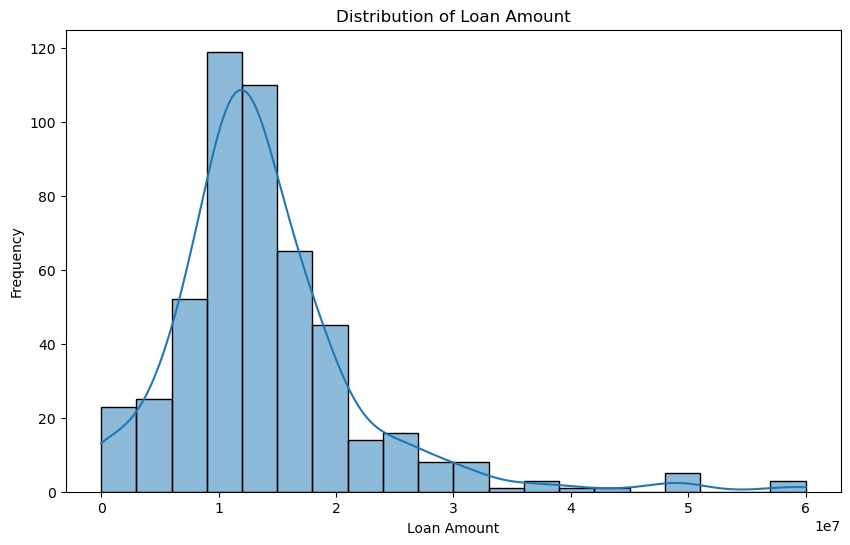

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['Loan_Amount'], bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


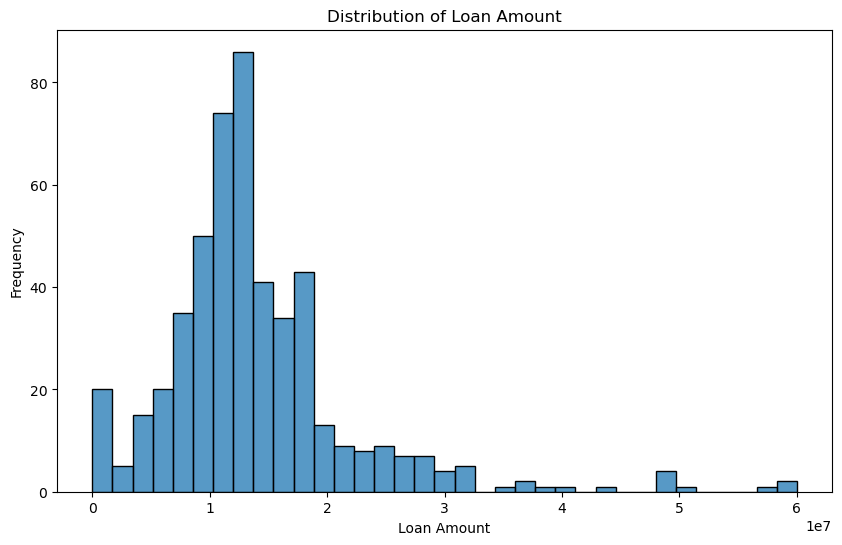

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['Loan_Amount'])
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


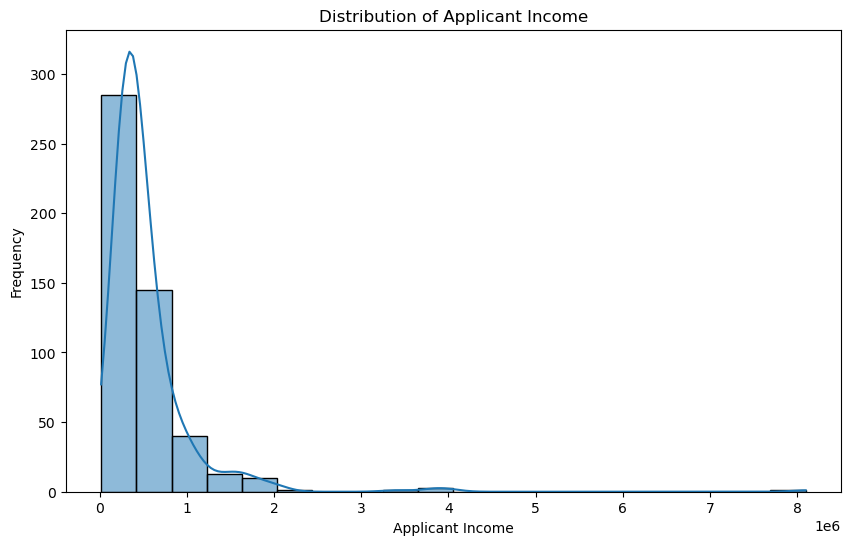

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(loan_data['Applicant_Income'], bins=20, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Function to calculate conditional probability
def conditional_prob(data, condition_column, condition_value, target_column, target_value):
    condition_count = len(data[data[condition_column] == condition_value])
    target_count = len(data[(data[condition_column] == condition_value) & (data[target_column] == target_value)])
    if condition_count == 0:
        return 0
    return "{0:.4f}".format(target_count / condition_count)

In [19]:
# Function to calculate marginal probability
def marginal_prob(data, target_column, target_value):
    target_count = len(data[data[target_column] == target_value])
    total_count = len(data)
    return "{0:.4f}".format(target_count / total_count)

## Marginal Probability of Loan Approval:
Calculate the overall probability of loan approval.<br>
P(Status = Y) = (Number of approved loans) / (Total number of loans)

In [109]:
# Marginal Probability of Loan Approval
prob_loan_approval = marginal_prob(loan_data, 'Status', 'Y')
print("Marginal Probability of Loan Approval:", prob_loan_approval)

Marginal Probability of Loan Approval: 0.6834


## Marginal Probability of Loan rejection:
Calculate the overall probability of loan rejection.<br>
P(Status = N) = (Number of rejected loans) / (Total number of loans)

In [110]:
# Marginal Probability of Loan Rejection
prob_loan_rej = marginal_prob(loan_data, 'Status', 'N')
print("Marginal Probability of Loan Rejection:", prob_loan_rej)

Marginal Probability of Loan Rejection: 0.3166


## Conditional Probability of Loan Approval Given Gender:

Calculate the probability of loan approval given the gender of the applicant <br>.
P(Status = Y | Gender = Male) = (Number of Male applicants with Status = Y) / (Total number of Male applicants)

In [22]:
# 1. Conditional Probability of Loan Approval Given Gender
prob_gender_loan_approval = conditional_prob(loan_data, 'Gender', 'Male', 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Gender (Male):", prob_gender_loan_approval)

Conditional Probability of Loan Approval Given Gender (Male): 0.6959


In [23]:
prob_gender_loan_approval = conditional_prob(loan_data, 'Gender', 'Female', 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Gender (Female):", prob_gender_loan_approval)

Conditional Probability of Loan Approval Given Gender (Female): 0.6250


## Conditional Probability of Loan Approval Given Education:
Calculate the probability of loan approval given the education level of the applicant <br>.
P(Status = Y | Education = Graduate) = (Number of Graduate applicants with Status = Y) / (Total number of Graduate applicants)

In [24]:
# 2. Conditional Probability of Loan Approval Given Education
prob_education_loan_approval = conditional_prob(loan_data, 'Education', 'Graduate', 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Education (Graduate):", prob_education_loan_approval)

Conditional Probability of Loan Approval Given Education (Graduate): 0.7038


In [25]:
prob_education_loan_approval = conditional_prob(loan_data, 'Education', 'Not Graduate', 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Education (Not Graduate):", prob_education_loan_approval)

Conditional Probability of Loan Approval Given Education (Not Graduate): 0.6058


## Conditional Probability of Loan Approval Given Credit History:
Calculate the probability of loan approval given the credit history of the applicant<br>.
P(Status = Y | Credit_History = 1.0) = (Number of applicants with good credit history and Status = Y) / (Total number of applicants with good credit history)

In [16]:
# 3. Conditional Probability of Loan Approval Given Credit History
prob_credit_history_loan_approval = conditional_prob(loan_data, 'Credit_History', 1.0, 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Credit History (Good):", prob_credit_history_loan_approval)


Conditional Probability of Loan Approval Given Credit History (Good): 0.7859


In [17]:
# 3. Conditional Probability of Loan Approval Given Credit History
prob_credit_history_loan_approval = conditional_prob(loan_data, 'Credit_History', 0.0, 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Credit History (Bad):", prob_credit_history_loan_approval)


Conditional Probability of Loan Approval Given Credit History (Bad): 0.0946


## Conditional Probability of Loan Approval Given Area:
Calculate the probability of loan approval given the area where the applicant resides<br>.
P(Status = Y | Area = Urban) = (Number of Urban applicants with Status = Y) / (Total number of Urban applicants)

In [18]:
prob_area_loan_approval = conditional_prob(loan_data, 'Area', 'Urban', 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Area (Urban):", prob_area_loan_approval)

Conditional Probability of Loan Approval Given Area (Urban): 0.6352


In [65]:
prob_area_loan_approval = conditional_prob(loan_data, 'Area', 'Rural', 'Status', 'Y')
print("Conditional Probability of Loan Approval Given Area (Rural):", prob_area_loan_approval)

Conditional Probability of Loan Approval Given Area (Rural): 0.6069


## Conditional Probability of Loan Approval Given if Candidate is self employed or not:

Calculate the probability of loan approval given Given if Candidate is self employed or not:<br>
. P(Status = Y | Self_Employeda =Yesn) = (Number of Urban applicants with Status = Y) / (Total number ofSelf Employedn applicants)

In [111]:
prob_approval = conditional_prob(loan_data, 'Area', 'Urban', 'Self_Employed', 'Yes')
print("Conditional Probability of Loan Approval Given if Candidate is self employed :yes:", prob_approval)

Conditional Probability of Loan Approval Given if Candidate is self employed :yes: 0.1132


In [112]:
prob_approval = conditional_prob(loan_data, 'Area', 'Urban', 'Self_Employed', 'No')
print("Conditional Probability of Loan Approval Given if Candidate is self employed :No:", prob_approval)

Conditional Probability of Loan Approval Given if Candidate is self employed :No: 0.8868


In [105]:
# Function to perform normal distribution analysis
def normal_distribution_analysis(data, column):
    # Calculate basic statistics
    mean = np.mean(data[column])
    std_dev = np.std(data[column])
    
    print("Statistics for column '{}':".format(column))
    print("Mean:", mean)
    print("Standard Deviation:", std_dev)
    plt.figure(figsize=(8, 3))
    sns.kdeplot(data[column], color='blue', fill=True)
    plt.title('Density Plot of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()
     

Statistics for column 'Loan_Amount':

Mean: 13952505.01002004

Standard Deviation: 8336870.849941954


d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


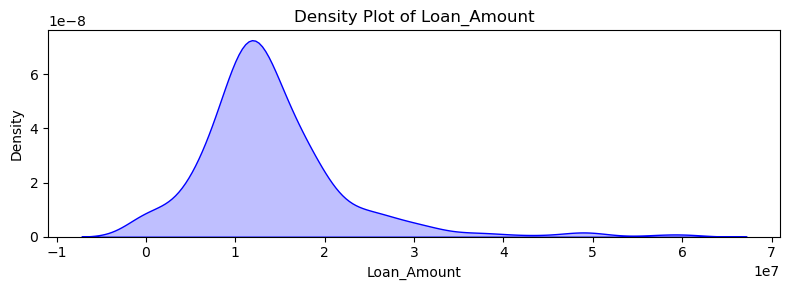

In [106]:
normal_distribution_analysis(loan_data, "Loan_Amount")

Statistics for column 'Applicant_Income':

Mean: 533612.8256513026

Standard Deviation: 561252.483697618


d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


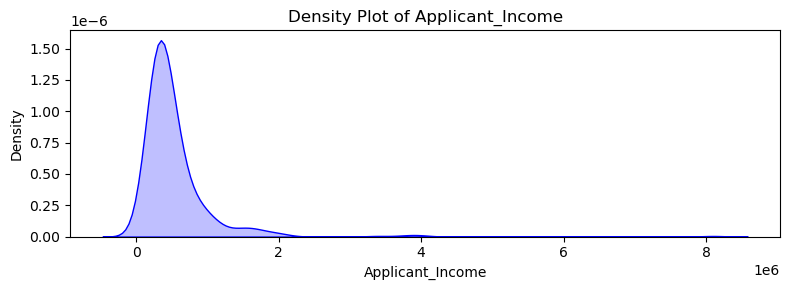

In [107]:
normal_distribution_analysis(loan_data, "Applicant_Income")

Statistics for column 'Coapplicant_Income':

Mean: 156699.5831640561

Standard Deviation: 257836.7173813811


d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


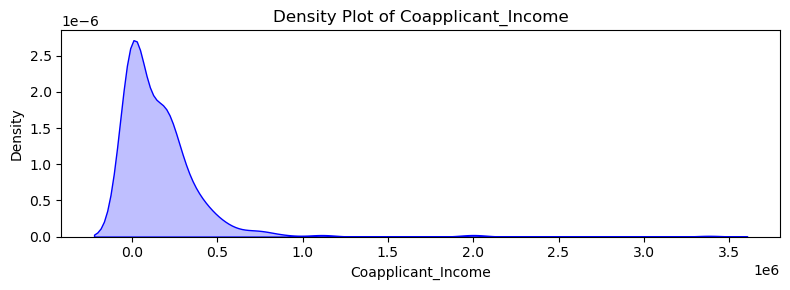

In [108]:
normal_distribution_analysis(loan_data, "Coapplicant_Income")

## Probability of Loan Approval Given Multiple Conditions:

Calculate the probability of loan approval given multiple conditions simultaneously, such as gender, education, and credit history.

In [37]:
# Function to calculate probability given multiple conditions
def conditional_prob_multiple_conditions(data, conditions_dict, target_column, target_value):
    condition_mask = pd.Series(True, index=data.index)
    for column, value in conditions_dict.items():
        condition_mask &= (data[column] == value)
    condition_count = condition_mask.sum()
    target_count = ((data[target_column] == target_value) & condition_mask).sum()
    if condition_count == 0:
        return 0
    return "{0:.4f}".format(target_count / condition_count)

In [39]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Female', 'Education': 'Graduate', 'Credit_History': 1.0}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.7377


In [40]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Female', 'Education': 'Graduate', 'Credit_History': 1.0, 'Married':"Yes"}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.7895


In [44]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Female', 'Education': 'Not Graduate', 'Married':"No",}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.6364


In [51]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Female', 'Education': 'Not Graduate', 'Married':"Yes",}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.6667


In [45]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Male', 'Education': 'Not Graduate', 'Married':"No",}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.6000


In [47]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Male', 'Education': 'Not Graduate',"Area":"Rural"}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.5161


In [49]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Male', 'Education': 'Graduate',"Area":"Rural"}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.6489


In [113]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Female', 'Education': 'Graduate',"Area":"Rural"}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.5333


In [53]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Male', 'Education': 'Graduate',"Area":"Urban"}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.7048


In [114]:
# Define multiple conditions
multiple_conditions = {'Gender': 'Female', 'Education': 'Graduate',"Area":"Urban"}

# Calculate probability given multiple conditions
prob_loan_approval_multiple_conditions = conditional_prob_multiple_conditions(loan_data, multiple_conditions, 'Status', 'Y')
print("Probability of Loan Approval Given Multiple Conditions:", prob_loan_approval_multiple_conditions)

Probability of Loan Approval Given Multiple Conditions: 0.5238


## Central Limit Theorem

In [83]:
# Function to perform Central Limit Theorem analysis
def central_limit_theorem(data, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data['Loan_Amount'], size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    
    # Calculate mean and standard deviation of sample means
    mean_of_sample_means = np.mean(sample_means)
    std_dev_of_sample_means = np.std(sample_means)
    
    return sample_means, mean_of_sample_means, std_dev_of_sample_means

In [84]:
# Set parameters
sample_size = 100  # Sample size
num_samples = 50  # Number of samples

# Perform Central Limit Theorem analysis
sample_means, mean_of_sample_means, std_dev_of_sample_means = central_limit_theorem(loan_data, sample_size, num_samples)

# Print results
print("Mean of Sample Means:", mean_of_sample_means)
print("Standard Deviation of Sample Means:", std_dev_of_sample_means)

Mean of Sample Means: 14004200.0

Standard Deviation of Sample Means: 789163.2784158168


In [89]:
sample_means[0:10]

[12233000.0,
 12431000.0,
 12611000.0,
 12855000.0,
 12924000.0,
 12926000.0,
 13086000.0,
 13113000.0,
 13316000.0,
 13325000.0]

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

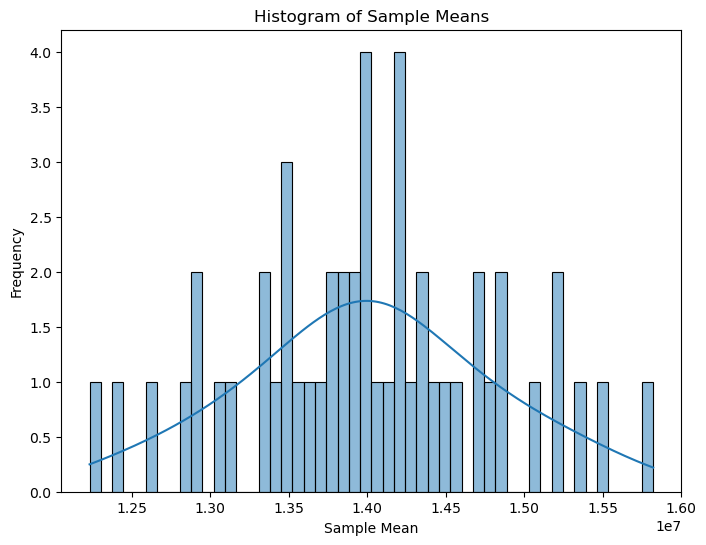

In [85]:
sample_means.sort()
# Plot histogram of sample means
plt.figure(figsize=(8, 6))

sns.histplot(sample_means, bins=50, kde=True)
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')

d:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Density')

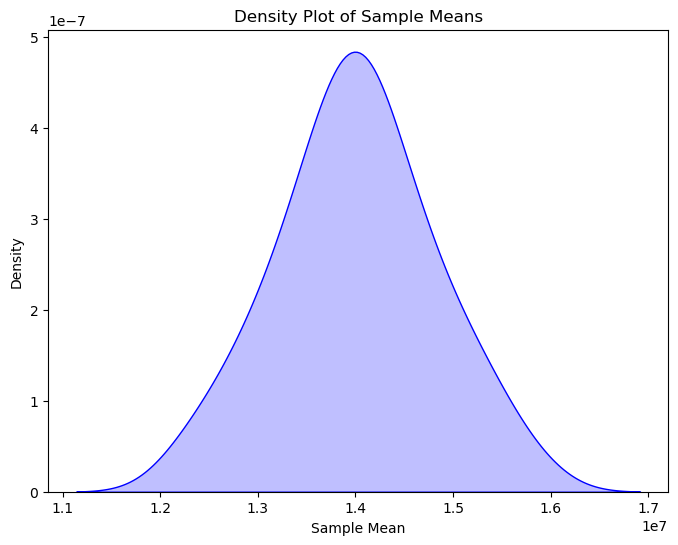

In [90]:
# Plot density plot of sample means
plt.figure(figsize=(8, 6))
sns.kdeplot(sample_means, color='blue', fill=True)
plt.title('Density Plot of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')

## Confidence Interval

In [31]:
loan= loan_data["Loan_Amount"].values


In [32]:
loan[0:10]

array([15000000, 12800000,  6600000, 12000000, 14100000, 26700000,
        9500000, 15800000, 16800000, 34900000], dtype=int64)

In [33]:
sample_mean=np.mean(loan)

In [34]:
std=np.std(loan)

In [35]:
n=60
p=.95

In [36]:
def critical_z_value(p):
 norm_dist = norm(loc=0.0, scale=1.0)
 left_tail_area = (1.0 - p) / 2.0
 upper_area = 1.0 - ((1.0 - p) / 2.0)
 return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)

In [37]:
def confidence_interval(p, sample_mean, sample_std, n):
 # Sample size must be greater than 30
 lower, upper = critical_z_value(p)
 lower_ci = lower * (sample_std / sqrt(n))
 upper_ci = upper * (sample_std / sqrt(n))
 return sample_mean + lower_ci, sample_mean + upper_ci

In [38]:
print(confidence_interval(p, sample_mean, std , n))


(11843024.39146163, 16061985.62857845)


## Linear Regression

In [39]:
# Filter cases where loan was given
loan_given_data = loan_data[loan_data['Status'] == 'Y']

In [40]:
from sklearn.linear_model import LinearRegression

# Extracting features and target variable
X = loan_given_data['Applicant_Income'].values.reshape(-1, 1)  # Feature: Applicant Income
y = loan_given_data['Loan_Amount'].values  # Target: Loan Amount

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Print the coefficients
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)


Slope (Coefficient): 8.29021408232351

Intercept: 9477807.519647662


In [41]:
prediction=model.predict(X)

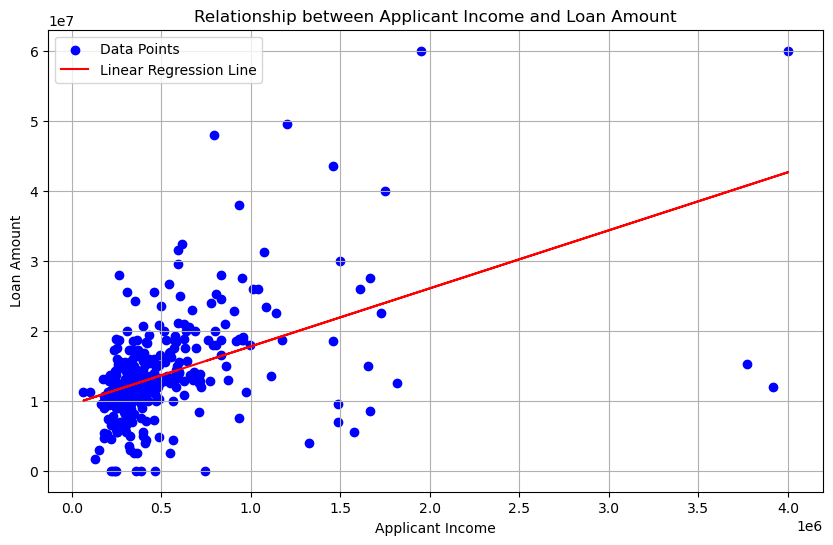

In [42]:
# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(X, prediction, color='red', label='Linear Regression Line')

# Add labels and title
plt.title('Relationship between Applicant Income and Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Statistical Count Analysis

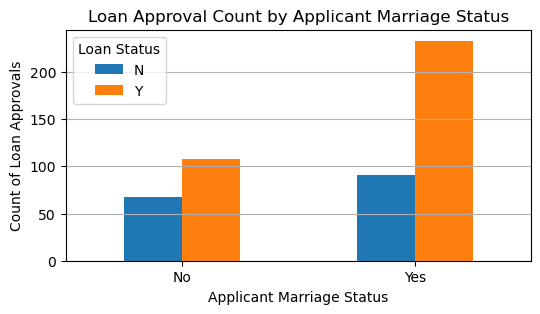

In [48]:
# Count loan approvals (yes and no) for applicant marriage column
loan_approval_counts = loan_data.groupby(['Married', 'Status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 3))

# Add labels and title
plt.title('Loan Approval Count by Applicant Marriage Status')
plt.xlabel('Applicant Marriage Status')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()

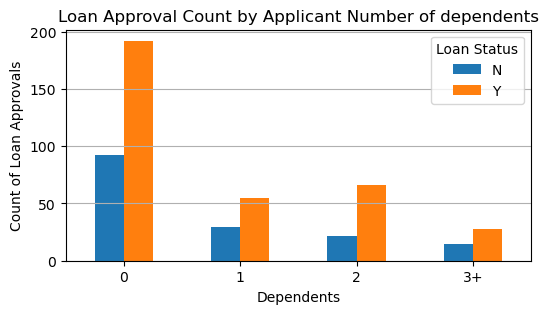

In [50]:
# Count loan approvals (yes and no) for applicant marriage column
loan_approval_counts = loan_data.groupby(['Dependents', 'Status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 3))

# Add labels and title
plt.title('Loan Approval Count by Applicant Number of dependents')
plt.xlabel('Dependents')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()

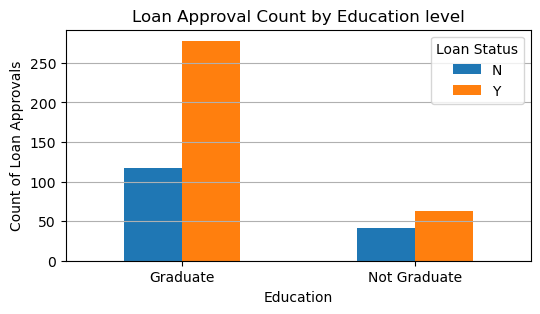

In [52]:
# Count loan approvals (yes and no) for applicant marriage column
loan_approval_counts = loan_data.groupby(['Education', 'Status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 3))

# Add labels and title
plt.title('Loan Approval Count by Education level')
plt.xlabel('Education')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()

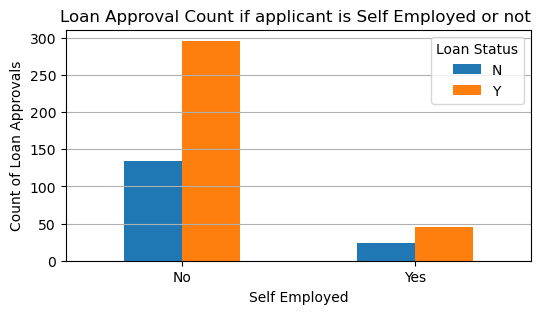

In [54]:
# Count loan approvals (yes and no) for applicant marriage column
loan_approval_counts = loan_data.groupby(['Self_Employed', 'Status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 3))

# Add labels and title
plt.title('Loan Approval Count if applicant is Self Employed or not ')
plt.xlabel('Self Employed')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()

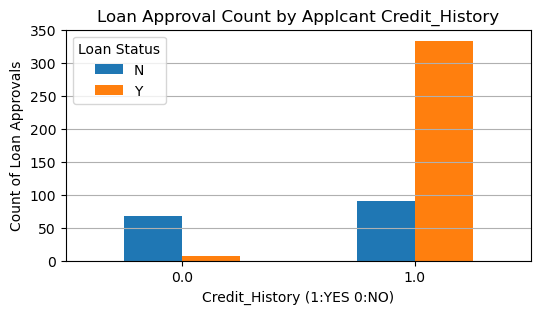

In [57]:
# Count loan approvals (yes and no) for applicant marriage column
loan_approval_counts = loan_data.groupby(['Credit_History', 'Status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 3))

# Add labels and title
plt.title('Loan Approval Count by Applcant Credit_History')
plt.xlabel('Credit_History (1:YES 0:NO)')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()

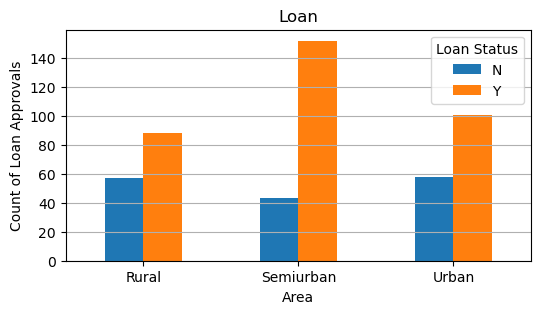

In [59]:
# Count loan approvals (yes and no) for applicant marriage column
loan_approval_counts = loan_data.groupby(['Area', 'Status']).size().unstack()

# Plot bar plot
loan_approval_counts.plot(kind='bar', figsize=(6, 3))

# Add labels and title
plt.title('Loan')
plt.ylabel('Count of Loan Approvals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show plot
plt.legend(title='Loan Status')
plt.grid(axis='y')
plt.show()